In [23]:
# PyTorch
import torch
from torch import optim
from torch.nn import MSELoss
from torch.utils.data import TensorDataset, DataLoader, random_split

# Numpy
import numpy as np

# PlotP∏P∏
import matplotlib.pyplot as plt


# User-Defined Class
from model import sin_ml, sin_qml
from trainer import trainer

%matplotlib inline


### Data 생성

In [24]:
# 데이터 생성
num_data = 20000  # 총 데이터 개수
batch_size = 128  # 배치 크기

# 입력 데이터 생성 (0부터 2π 사이의 값)
x_data = torch.rand(num_data, 1) * 2 * torch.pi  # (20000, 1) shape로 생성
y_data = torch.sin(2*x_data) # sin 함수로 출력 생성 (20000, 1)

# 텐서 데이터셋 생성
dataset = TensorDataset(x_data, y_data)

# Train/Test set 분할 (80%/20% 비율)
train_size = int(0.8 * num_data)
test_size = num_data - train_size
train_dataset, test_dataset = random_split(dataset, [train_size, test_size])

# DataLoader 생성
train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=batch_size, shuffle=False)

# 배치 예시 출력
x_batch, y_batch = next(iter(train_loader))
print("Example batch x:", x_batch.shape)  # Expected: [128, 1]
print("Example batch y:", y_batch.shape)  # Expected: [128, 1]


Example batch x: torch.Size([128, 1])
Example batch y: torch.Size([128, 1])


### RELU

In [4]:
model2 = sin_qml(num_qubit=2, num_layer=3 , use_qrelu=True)
trainer2 = trainer(model2, train_loader=train_loader, test_loader=train_loader  ,lr=0.001)
model2.state_dict()

OrderedDict([('theta',
              tensor([0.5120, 0.3866, 0.9727, 0.2743, 0.3340, 0.7096, 0.1599, 0.8891])),
             ('init_theta', tensor([0.4313]))])

100%|██████████| 100/100 [00:42<00:00,  2.34it/s]


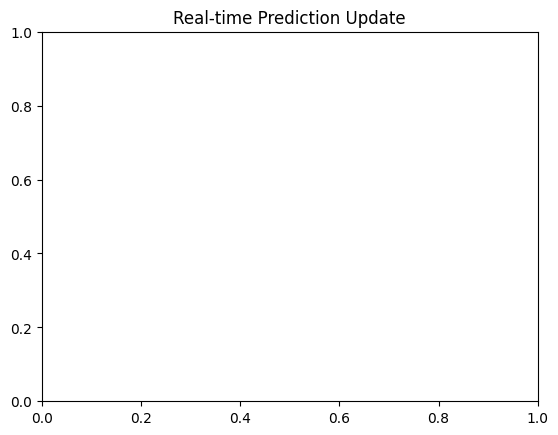

In [5]:
plt.ion()
trainer2.train(100,False)

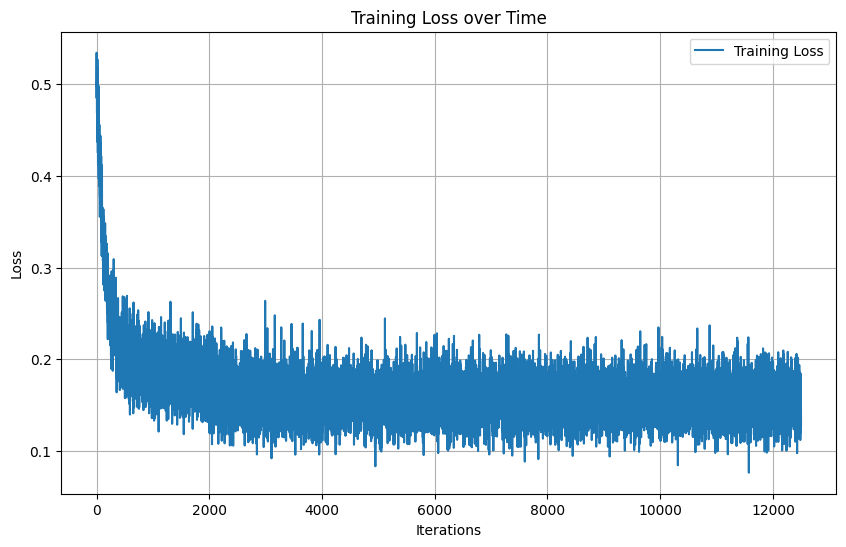

In [6]:
trainer2.plot_list(trainer2.train_loss_list)

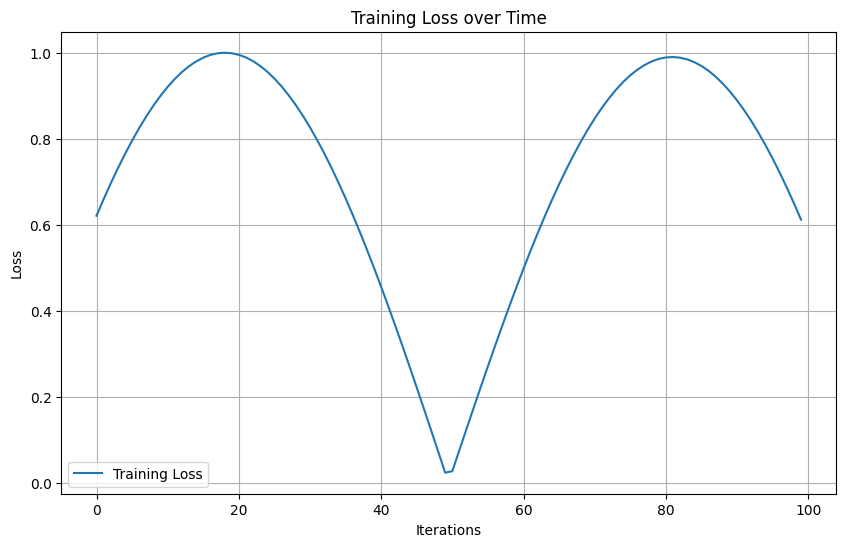

In [7]:
trainer2.plot_pred()

In [8]:
thetas = list(model2.state_dict().values())
thetas[0]

tensor([ 5.4772e-19, -1.0187e-42, -2.1535e-18,  2.7430e-01, -9.0090e-01,
        -5.2268e-43,  1.6343e-01,  8.8913e-01])

In [9]:
model2 = sin_qml(num_qubit=1, num_layer=2 , use_qrelu=True)
trainer2 = trainer(model2, train_loader=train_loader, test_loader=train_loader  ,lr=0.001)
model2.state_dict()

OrderedDict([('theta', tensor([0.5692, 0.0966])),
             ('init_theta', tensor([0.5117]))])

## 1 qubit with QReLU

In [32]:
model3 = sin_qml(num_qubit=2, num_layer=2 , use_qrelu=False)
trainer3 = trainer(model3, train_loader=train_loader, test_loader=train_loader  ,lr=0.001)
model3.state_dict()

OrderedDict([('theta', tensor([0.4250, 0.1125, 0.8262, 0.1225])),
             ('init_theta', tensor([0.0682]))])

100%|██████████| 200/200 [00:59<00:00,  3.38it/s]


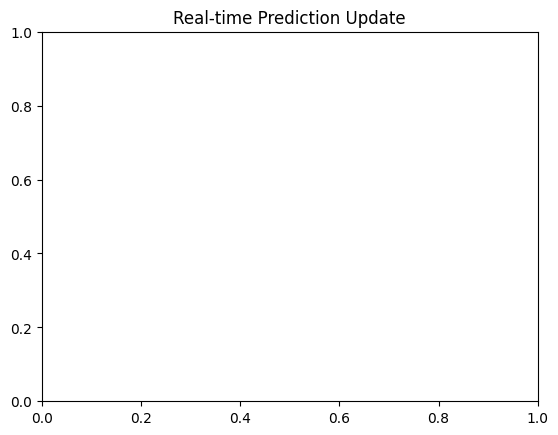

In [33]:
trainer3.train(200,False)

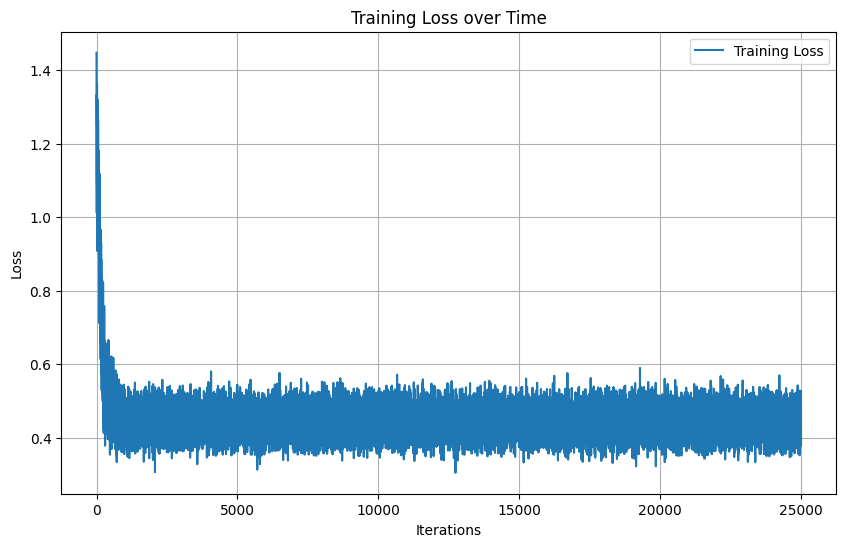

In [36]:
trainer3.plot_list(trainer3.train_loss_list)

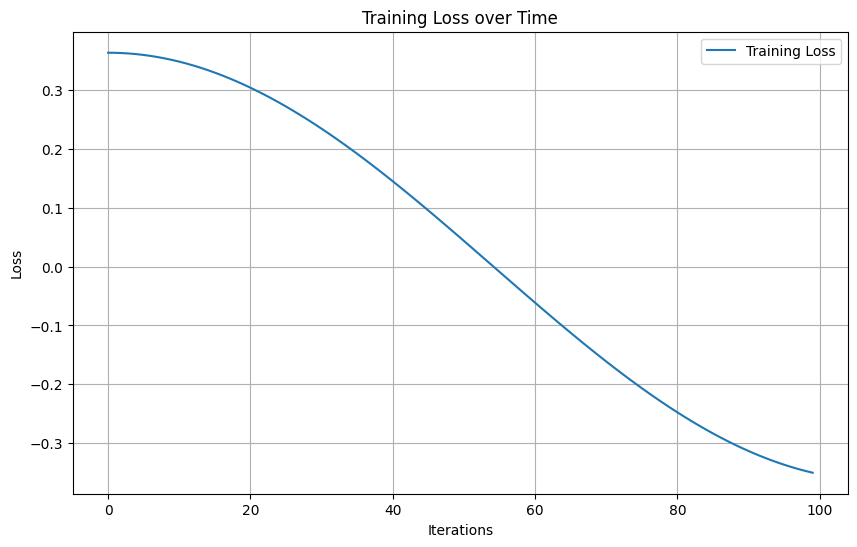

In [37]:
trainer3.plot_pred()

In [40]:
model3.state_dict()

OrderedDict([('theta', tensor([0.9564, 0.8883, 0.8238, 0.1225])),
             ('init_theta', tensor([0.4571]))])

## 1qubit multi-layer QReLU

In [114]:
model4 = sin_qml(num_qubit=3, num_layer=4, use_qrelu=True)
trainer4 = trainer(model4, train_loader=train_loader, test_loader=train_loader  ,lr=0.001)
model4.state_dict()

OrderedDict([('theta',
              tensor([0.1761, 0.0456, 0.9824, 0.9579, 0.7565, 0.2653, 0.1028, 0.4366, 0.0465,
                      0.1249, 0.4005, 0.6198, 0.5101, 0.6976, 0.6853, 0.7675, 0.5001, 0.8499]))])

100%|██████████| 100/100 [01:16<00:00,  1.30it/s]


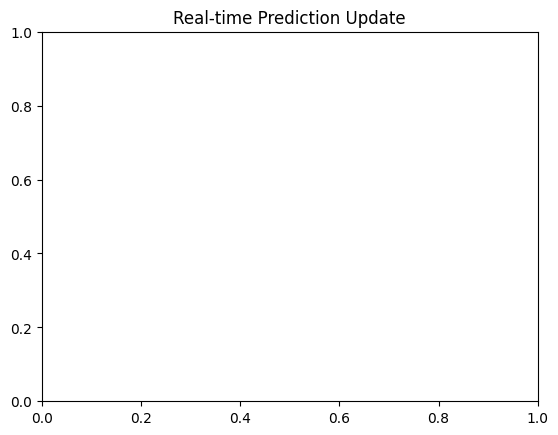

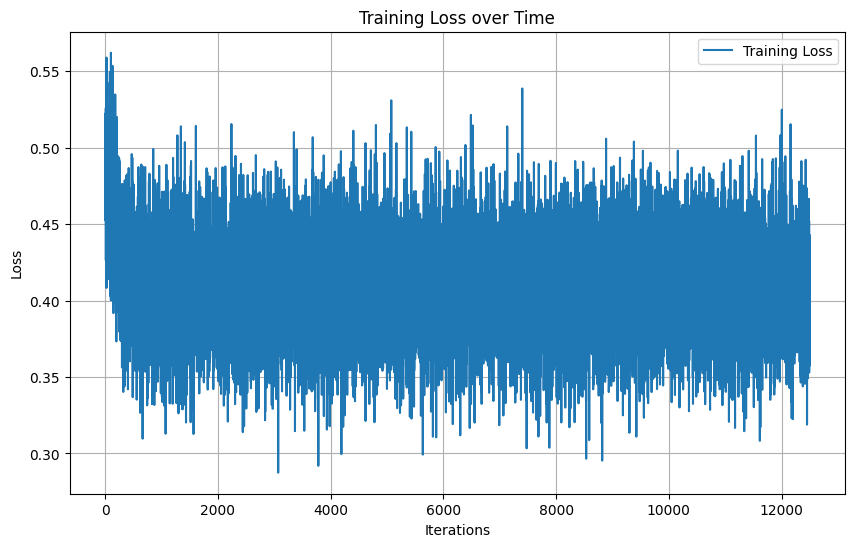

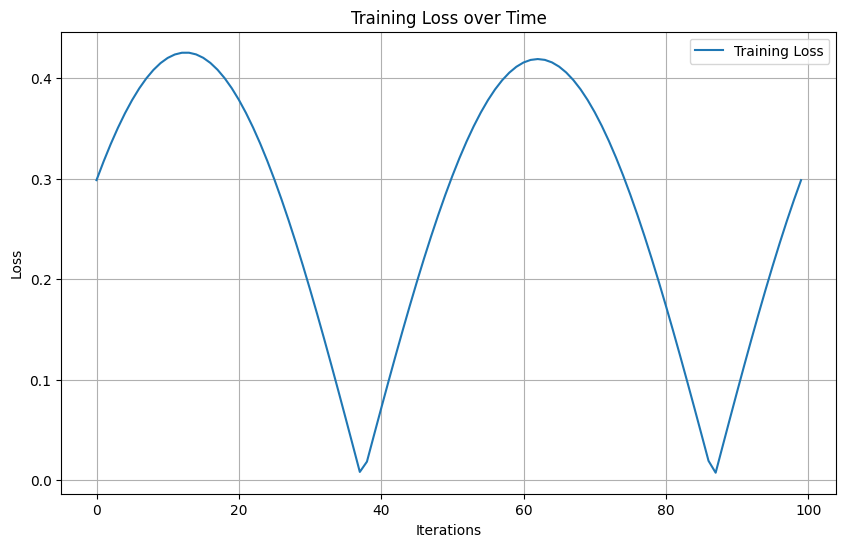

In [51]:
model4.train()
trainer4.train(100,False)
trainer4.plot_list(trainer4.train_loss_list)
trainer4.plot_pred()

# No RELU

100%|██████████| 100/100 [00:27<00:00,  3.66it/s]


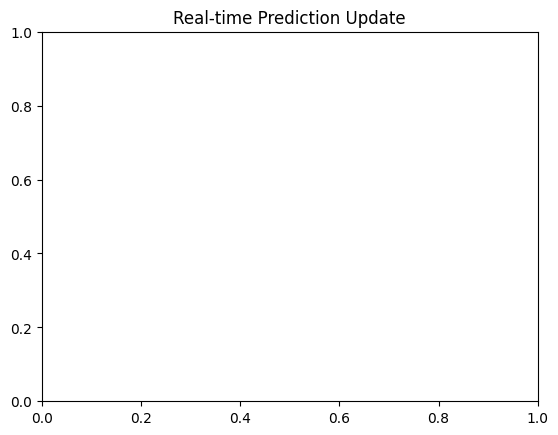

In [35]:
plt.ion()
trainer2.train(100,False)

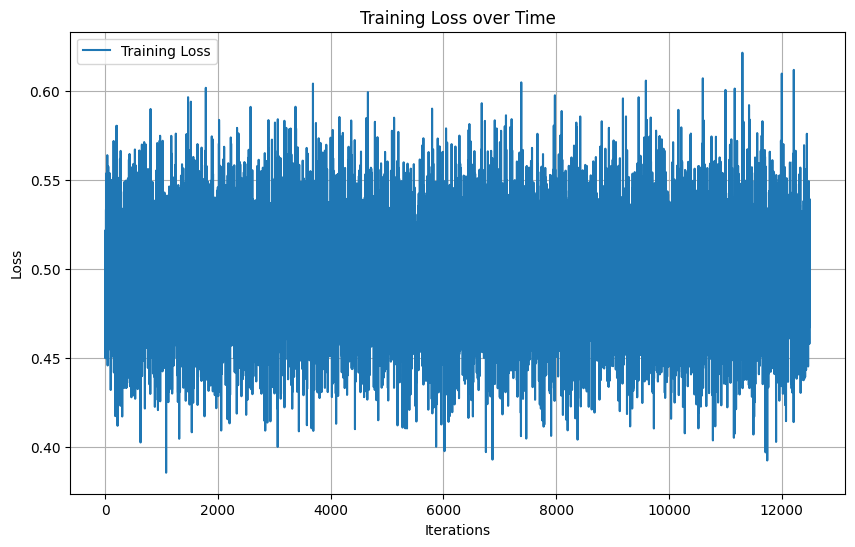

In [40]:
trainer2.plot_list(trainer2.train_loss_list)

In [39]:
model_no_relu = sin_qml(num_qubit=1, num_layer=2 , use_qrelu=False)
trainer_no_relu = trainer(model_relu, train_loader=train_loader, test_loader=train_loader  ,lr=0.001)
model_no_relu.state_dict()

OrderedDict([('theta', tensor([0.4166, 0.9318]))])

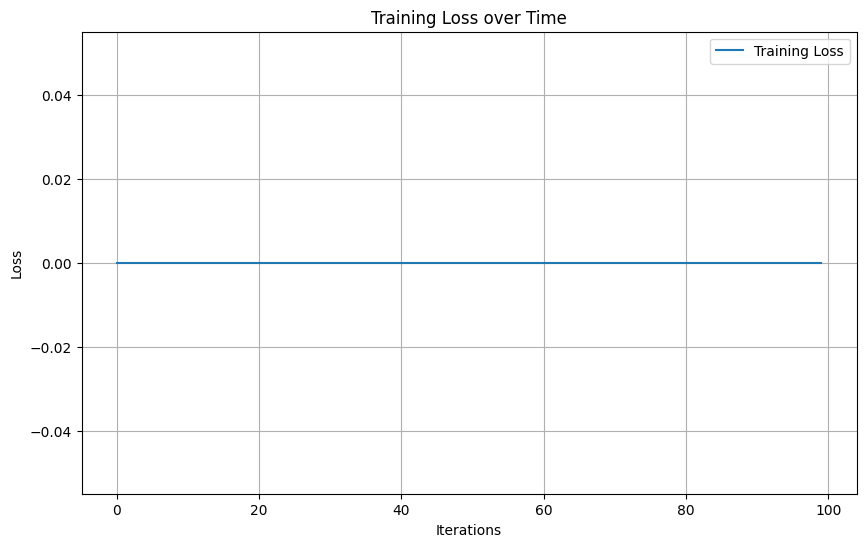

In [37]:
trainer2.plot_pred()

100%|██████████| 100/100 [00:27<00:00,  3.69it/s]


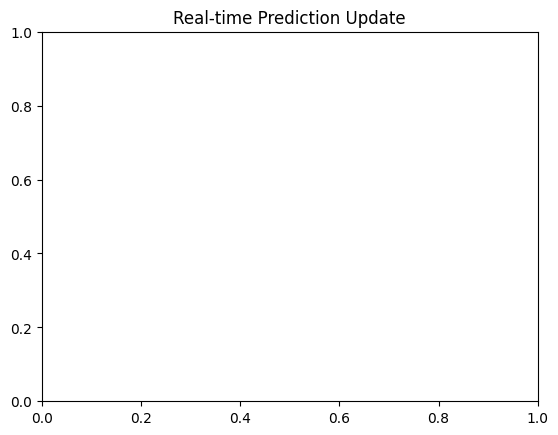

In [25]:
plt.ion()
trainer_no_relu.train(100,False)

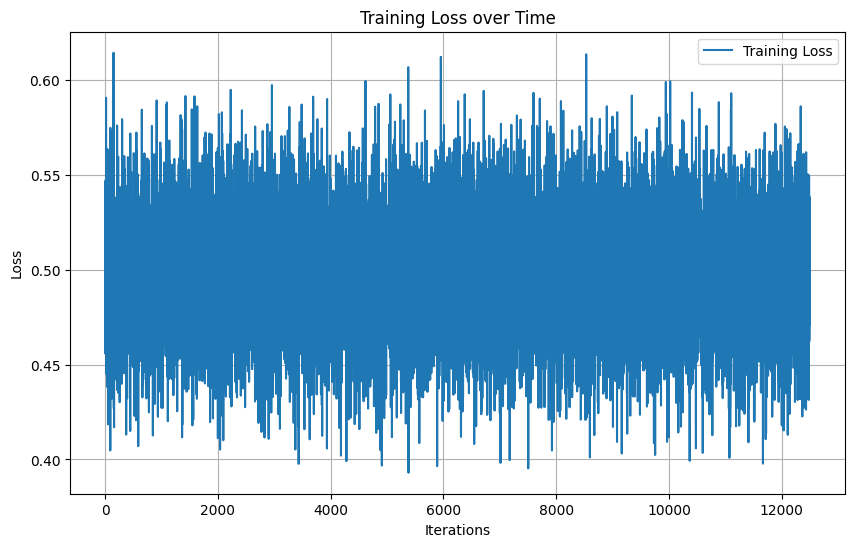

In [28]:
trainer_no_relu.plot_list(trainer_no_relu.train_loss_list)

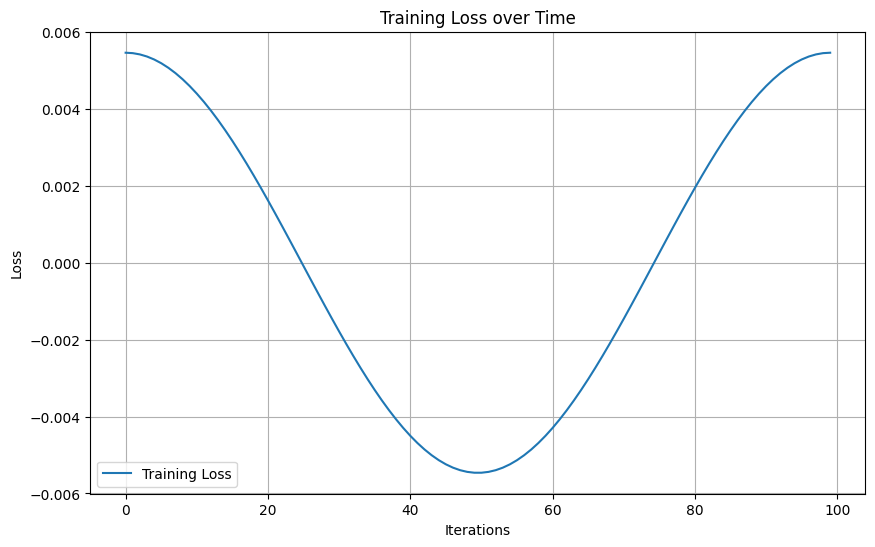

In [27]:
trainer_no_relu.plot_pred()